<a href="https://colab.research.google.com/github/gulistanburtek/machine-learning/blob/main/gis_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from scipy.io import loadmat

PaviaU = loadmat("/content/drive/MyDrive/GIS/PaviaU.mat")
PaviaU_gt = loadmat("/content/drive/MyDrive/GIS/PaviaU_gt.mat")
data_karabuk = loadmat("/content/drive/MyDrive/GIS/Karabuk_Pavia_Data.mat")

In [ ]:
x = data_karabuk["PaviaX"]
y = data_karabuk["PaviaY"]

In [ ]:
print(data_karabuk.keys())

dict_keys(['__header__', '__version__', '__globals__', 'PaviaU', 'PaviaX', 'PaviaY'])


In [ ]:
print(PaviaU.keys())

dict_keys(['__header__', '__version__', '__globals__', 'paviaU'])


In [ ]:
print(PaviaU_gt.keys())

dict_keys(['__header__', '__version__', '__globals__', 'paviaU_gt'])


In [ ]:
PaviaU["paviaU"].shape

(610, 340, 103)

In [ ]:
PaviaU_gt["paviaU_gt"].shape

(610, 340)

In [ ]:
data_karabuk["PaviaU"].shape

(42776, 104)

In [ ]:
PaviaU_gt["paviaU_gt"]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
data_karabuk

{'PaviaU': array([[1467, 1298, 1298, ..., 1327, 1315,    1],
        [1203, 1295, 1302, ..., 1144, 1126,    1],
        [1341, 1346, 1272, ..., 1123, 1101,    1],
        ...,
        [ 841,  785, 1107, ..., 1275, 1265,    1],
        [1507, 1731, 1581, ..., 1378, 1344,    1],
        [1416, 1114, 1397, ..., 1483, 1489,    1]], dtype=uint16),
 'PaviaX': array([[1467, 1298, 1298, ..., 1346, 1327, 1315],
        [1203, 1295, 1302, ..., 1167, 1144, 1126],
        [1341, 1346, 1272, ..., 1128, 1123, 1101],
        ...,
        [ 841,  785, 1107, ..., 1287, 1275, 1265],
        [1507, 1731, 1581, ..., 1401, 1378, 1344],
        [1416, 1114, 1397, ..., 1490, 1483, 1489]], dtype=uint16),
 'PaviaY': array([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Feb 25 15:07:09 2022',
 '__version__': '1.0'}

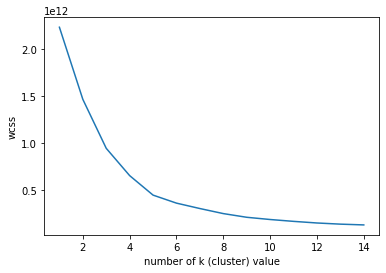

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=7)
km.fit(x)
km.predict(x)

array([1, 1, 1, ..., 1, 1, 2], dtype=int32)

In [ ]:
PaviaU["paviaU"].shape

(610, 340, 103)

In [ ]:
Pavia_U = PaviaU["paviaU"].reshape(207400,103)

In [ ]:
Pavia_U.shape

(207400, 103)

In [ ]:
predict = kmeans.predict(Pavia_U)
predict

array([12,  6,  8, ...,  6,  8,  6], dtype=int32)

In [ ]:
predict.shape

(207400,)

In [ ]:
B2_predict = predict.reshape(610,340)

In [ ]:
B2_predict

array([[12,  6,  8, ...,  6,  6,  6],
       [ 6,  8,  9, ..., 12,  6,  6],
       [ 6,  9,  9, ...,  1,  6,  6],
       ...,
       [ 1,  8,  8, ...,  6,  6,  6],
       [ 8,  1,  4, ...,  6,  6,  6],
       [ 8,  1,  1, ...,  6,  8,  6]], dtype=int32)

In [ ]:
B2_predict.shape

(610, 340)

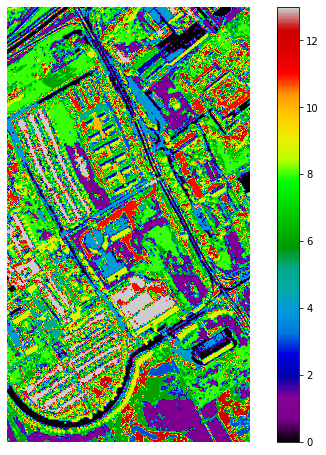

<Figure size 432x288 with 0 Axes>

In [ ]:
fig=plt.figure(figsize=(10,8))
plt.imshow(B2_predict, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.show()
plt.savefig('Predicted_image.PNG')